<a href="https://colab.research.google.com/github/stacykeago/MORINGA-WEEK-3-IP/blob/main/WEEK_4_CORE_INDEPENDENT_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 INTRODUCTION

- we have been tasked to understand electric car usage by solving for another research question. 
- We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

- We need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then - perform hypothesis testing with regards to the claim that we will have made. An example of claim to test would be 
1. "Is the number of Bluecars taken in area X different than in area Y? 
2. Is it greater in area X than in area Z? Etc”.
3.  The selected periods of interest be either weekdays or weekends but not a mix of both. 
4. You can also consider postal codes 75015 vs 75017 to some of the areas of interest. 

# 2.0 LOAD AND PREVIEW THE DATASETS

## 2.01 IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np


1. load the datasets:
 [http://bit.ly/DSCoreAutolibDataset (Links to an external site.)] 
2. Data description:
 [Link] respectively.

## 2.02 LOAD DATASETS

In [ ]:
#1. Load the Dataset [http://bit.ly/DSCoreAutolibDataset 

df= pd.read_csv('/content/autolib_daily_events_postal_code.csv')
df

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [ ]:
#Load the dataset description
cars_df = pd.read_excel ('/content/columns_explanation.xlsx')
cars_df


,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


# 3.0 DATA CLEANING

## 3.01 Accessing the information

In [ ]:
# Getting to know more about the dataset by accessing its information

print(df.columns)
print(df.shape)
print(df.isnull().sum())

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')
(16085, 13)
Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64


## 3.02 CHECK FOR DUPLICATES

In [ ]:
#checking for duplicates
df.duplicated().sum()

0

## 3.03 CHECKING FOR DATA TYPES

In [ ]:
#Checking column datatypes
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

## 3.04 Converting "date" column to datetime data type

In [ ]:
df['date']=pd.to_datetime(df['date'])
df.dtypes

Postal code                        int64
date                      datetime64[ns]
n_daily_data_points                int64
dayOfWeek                          int64
day_type                          object
BlueCars_taken_sum                 int64
BlueCars_returned_sum              int64
Utilib_taken_sum                   int64
Utilib_returned_sum                int64
Utilib_14_taken_sum                int64
Utilib_14_returned_sum             int64
Slots_freed_sum                    int64
Slots_taken_sum                    int64
dtype: object

### 3.05 DROP COLUMNS NOT IN USE

DROP THE FOLLOWING COLUMNS
-Utilib_taken_sum                   
-Utilib_returned_sum                
-Utilib_14_taken_sum               
-Utilib_14_returned_sum  

In [ ]:
df.drop('Utilib_taken_sum', axis=1,inplace=True)



In [ ]:
df.drop('Utilib_returned_sum', axis=1, inplace= True)

In [ ]:
df.drop('Utilib_14_taken_sum',  axis=1, inplace=True)

In [ ]:
df.drop('Utilib_14_returned_sum', axis=1, inplace= True)

In [ ]:
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,22,20
1,75001,2018-01-02,1438,1,weekday,98,94,23,22
2,75001,2018-01-03,1439,2,weekday,138,139,27,27
3,75001,2018-01-04,1320,3,weekday,104,104,25,21
4,75001,2018-01-05,1440,4,weekday,114,117,18,20


# 4.0 EXPLORATORY DATA ANALYSIS

1. "Is the number of Bluecars taken in area 15015 different than in area 15017
2. Is it greater in area 15015 than in area 15017
3. The selected periods of interest be either weekdays or weekends but not a mix of both.
4. You can also consider postal codes 75015 vs 75017 to some of the areas of interest.

# 4.01 UNIVARIATE ANALYSIS

In [ ]:
1. Mode
2. Median
3. mean
4. interquartile range
5. the standard deviation
6. variance
7. skewness
8. kurtosis 
9. histogram
10. bar chart
11. box plot
12. frequency table

### MODE

In [ ]:
# Which day type (weekday or weekend) has the most car hire.

df['day_type'].mode()

0    weekday
dtype: object

## MEAN

In [27]:
# Mean of the BlueCars_taken_sum
df['BlueCars_taken_sum'].mean()

125.92695057506994

In [28]:
#Mean of the BlueCars_returned_sum	
df['BlueCars_returned_sum'].mean()

125.912713708424

### RECOMMENDATIONS 

1. There is more activity in the weekday than weekend.

# 5.0 BIVARIATE ANALYSIS

1. scatter plots
2. line charts to determine the relationship between variables
3. Boxplot 
4. Give recommendations while working on the current problem.

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

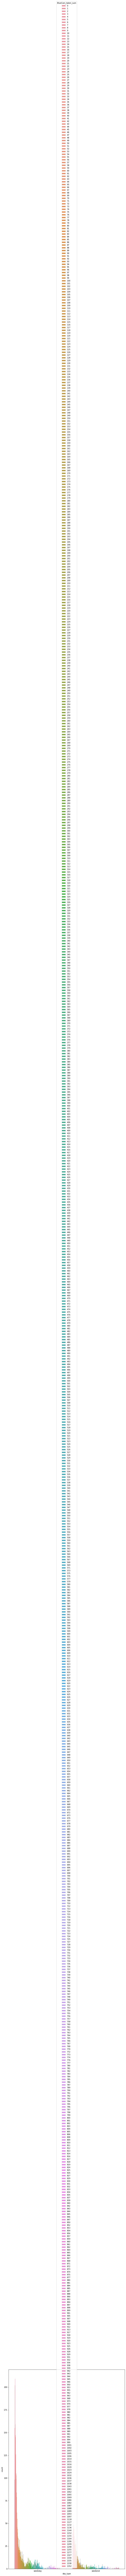

In [ ]:
# Comparing Blue-cars sharing between weekday and weekend.

plt.figure(figsize=(25,20))
plt.subplot(1,2,1)
sns.countplot(x='day_type', data=df ,hue='BlueCars_taken_sum' )


### COMPARIING THE POSTAL CODE 75015 AND 75017

### Hypothesis testing
NULL HYPOTHESIS - Blue cars in Postal code 75015 has MOST sharing than 75017

ALTERNATIVE HYPOTHESIS- Blue cars in Postal code 75017 has MOST sharing than in postal code 75015

In [ ]:
#Plot a graph with details of potal code 75015 
specific_postal = df[df['Postal code']==75015]
specific_postal

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
2184,75015,2018-01-01,1440,0,weekday,781,843,202,215
2185,75015,2018-01-02,1438,1,weekday,710,720,191,193
2186,75015,2018-01-03,1439,2,weekday,739,752,194,201
2187,75015,2018-01-04,1320,3,weekday,669,644,165,158
2188,75015,2018-01-05,1440,4,weekday,852,846,196,198
...,...,...,...,...,...,...,...,...,...
2335,75015,2018-06-15,1440,4,weekday,1093,1056,288,294
2336,75015,2018-06-16,1440,5,weekend,1209,1154,310,290
2337,75015,2018-06-17,1440,6,weekend,1001,1090,225,244
2338,75015,2018-06-18,1440,0,weekday,669,698,183,183


In [ ]:
#Plot a graph with details of potal code 75017
other_postal = df[df['Postal code']==75017]
other_postal

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
2496,75017,2018-01-01,1440,0,weekday,634,671,159,171
2497,75017,2018-01-02,1438,1,weekday,548,542,125,126
2498,75017,2018-01-03,1439,2,weekday,638,616,153,144
2499,75017,2018-01-04,1320,3,weekday,553,534,141,145
2500,75017,2018-01-05,1440,4,weekday,705,703,179,180
...,...,...,...,...,...,...,...,...,...
2647,75017,2018-06-15,1440,4,weekday,766,753,192,189
2648,75017,2018-06-16,1440,5,weekend,859,891,222,231
2649,75017,2018-06-17,1440,6,weekend,729,775,163,166
2650,75017,2018-06-18,1440,0,weekday,650,639,179,177


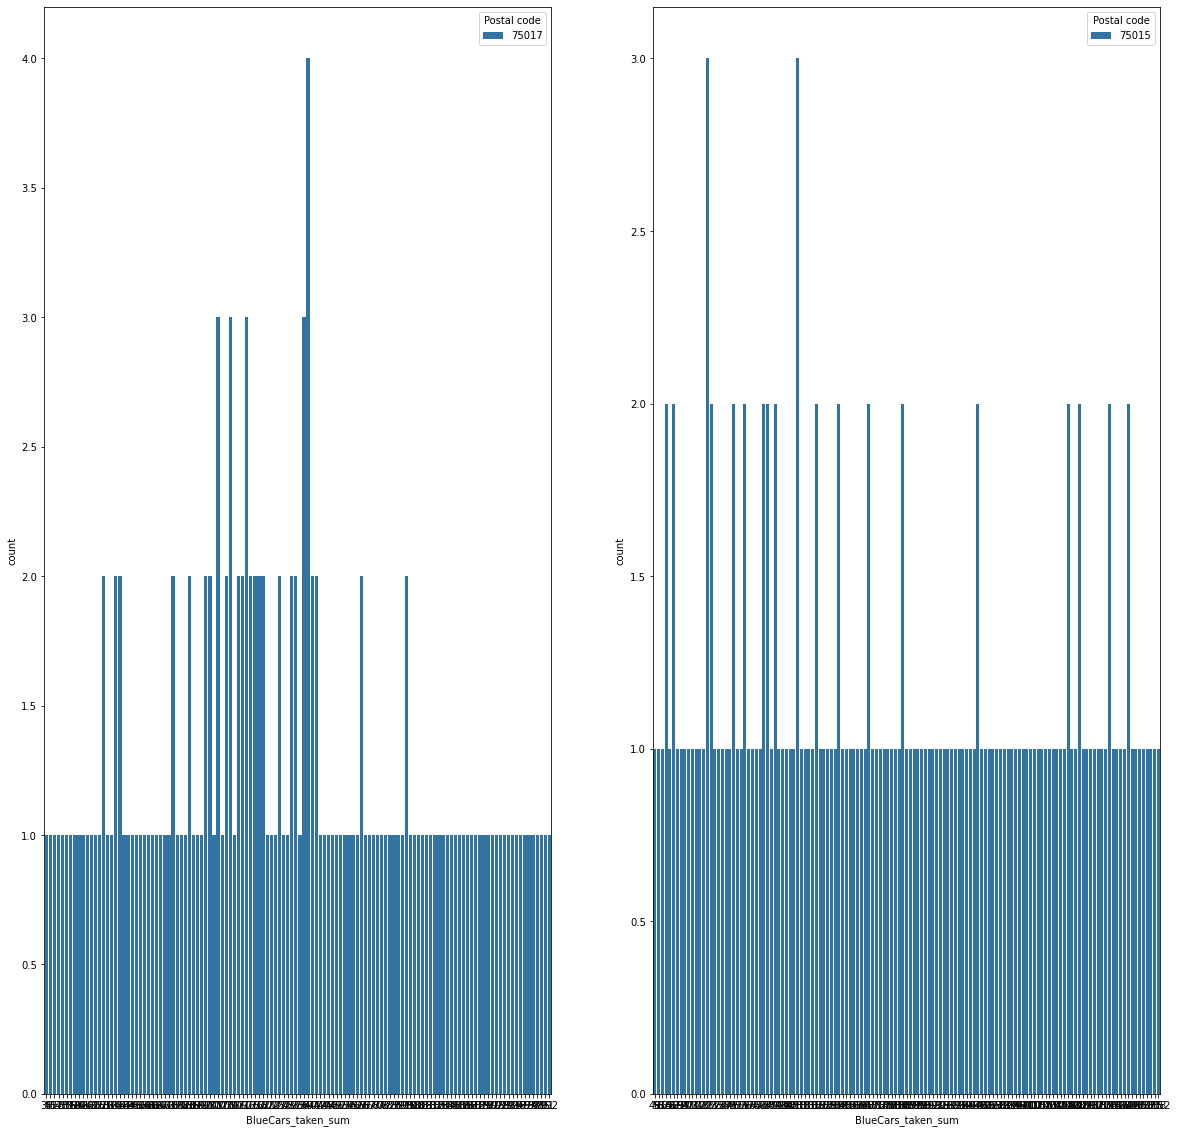

In [ ]:
## COMPARING POSTAL CODE 75017 AND 75015

plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
sns.countplot(x='BlueCars_taken_sum', data=other_postal, hue='Postal code')
plt.subplot(1,2,2)
sns.countplot(x='BlueCars_taken_sum', data=specific_postal, hue= 'Postal code')

# 6.0 RECOMMENDATIONS

1. There is more car sharing in postal code 75017 than in 75015.

### Hypothesis-1

NULL HYPOTHESIS - Blue cars in Postal code 75015 has MOST sharing than 75017

ALTERNATIVE HYPOTHESIS- Blue cars in Postal code 75017 has MOST sharing than in postal code 75015


-From the above we conclude that the alternative hypothesis is true

NULL HYPOTHESIS - The number of Bluecars taken in area 75015 MORE than in area 75017

ALTERNATIVE HYPOTHESIS - The number of Bluecars taken in area 75015 LESS than in area 75017?

### REPORT

REPORT

https://docs.google.com/document/d/1jGeDDwVwwmpvXD4kyVgyMMBkgo6gX_RyLCwKBb4kYng/edit#